In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

In [71]:
def read_dataset(fname):
    # 指定索引
    data = pd.read_csv(fname, index_col=0) 
    # 處理rbc特徵
    #data['rbc'] = (data['rbc'] == 'normal').astype('int')
    rbc_mapping = {'normal':2,'abnormal':4,'0':4}
    data['rbc'] = data['rbc'].map(rbc_mapping)
    # 處理pc特徵
    #data['pc'] = (data['pc'] == 'normal').astype('int')
    pc_mapping = {'normal':2,'abnormal':4,'0':4}
    data['pc'] = data['pc'].map(pc_mapping)
    # 處理pcc特徵
    #data['pcc'] = (data['pcc'] == 'present').astype('int')
    pcc_mapping = {'present':2,'notpresent':4,'0':4}
    data['pcc'] = data['pcc'].map(pcc_mapping)
    # 處理ba特徵
    #data['ba'] = (data['ba'] == 'present').astype('int')
    ba_mapping = {'present':2,'notpresent':4,'0':4}
    data['ba'] = data['ba'].map(ba_mapping)
    # 處理htn特徵
    #data['htn'] = (data['htn'] == 'yes').astype('int')
    htn_mapping = {'yes':2,'no':4,'0':4}
    data['htn'] = data['htn'].map(htn_mapping)
    # 處理dm特徵
    #data['dm'] = (data['dm'] == 'yes').astype('int')
    dm_mapping = {'yes':2,'no':4,'0':4}
    data['dm'] = data['dm'].map(dm_mapping)
    # 處理cad特徵
    #data['cad'] = (data['cad'] == 'yes').astype('int')
    cad_mapping = {'yes':2,'no':4,'0':4}
    data['cad'] = data['cad'].map(cad_mapping)
    # 處理appet特徵
    #data['appet'] = (data['appet'] == 'good').astype('int')
    appet_mapping = {'good':2,'poor':4,'0':4}
    data['appet'] = data['appet'].map(appet_mapping)
    # 處理pe特徵
    #data['pe'] = (data['pe'] == 'yes').astype('int')
    pe_mapping = {'yes':2,'no':4,'0':4}
    data['pe'] = data['pe'].map(pe_mapping)
    # 處理ane特徵
    #data['ane'] = (data['ane'] == 'yes').astype('int')
    ane_mapping = {'yes':2,'no':4,'0':4}
    data['ane'] = data['ane'].map(ane_mapping)
    # 處理class特徵
    #data['class'] = (data['class'] == 'ckd').astype('int')
    class_mapping = {'ckd':2,'notckd':4,'0':4}
    data['class'] = data['class'].map(class_mapping)
    # 處理遺缺值
    data = data.fillna(0)
    return data

train = read_dataset('chronic_kidney_disease_full.csv')

In [72]:
train.head()

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
age,,,,,,,,,,,,,,,,,,,,,,,,
48,80,1.020,1,0,4,2,4,4,121,36.0,1.2,0.0,0.0,15.4,44,7800,5.2,2,2,4,2,4,4,2
7,50,1.020,4,0,4,2,4,4,0,18.0,0.8,0.0,0.0,11.3,38,6000,0.0,4,4,4,2,4,4,2
62,80,1.010,2,3,2,2,4,4,423,53.0,1.8,0.0,0.0,9.6,31,7500,0.0,4,2,4,4,4,2,2
48,70,1.005,4,0,2,4,2,4,117,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,2,4,4,4,2,2,2
51,80,1.010,2,0,2,2,4,4,106,26.0,1.4,0.0,0.0,11.6,35,7300,4.6,4,4,4,2,4,4,2


In [73]:
from sklearn.model_selection import train_test_split

y = train['class']
X = train.drop(['class'], axis=1)

#切分訓練與驗證資料集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('train dataset: {0}; test dataset: {1}'.format(
    X_train.shape, X_test.shape))


train dataset: (320, 23); test dataset: (80, 23)


In [74]:
train.fillna(0)

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
age,,,,,,,,,,,,,,,,,,,,,,,,
48,80,1.020,1,0,4,2,4,4,121,36.0,1.2,0.0,0.0,15.4,44,7800,5.2,2,2,4,2,4,4,2
7,50,1.020,4,0,4,2,4,4,0,18.0,0.8,0.0,0.0,11.3,38,6000,0.0,4,4,4,2,4,4,2
62,80,1.010,2,3,2,2,4,4,423,53.0,1.8,0.0,0.0,9.6,31,7500,0.0,4,2,4,4,4,2,2
48,70,1.005,4,0,2,4,2,4,117,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,2,4,4,4,2,2,2
51,80,1.010,2,0,2,2,4,4,106,26.0,1.4,0.0,0.0,11.6,35,7300,4.6,4,4,4,2,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,80,1.020,0,0,2,2,4,4,140,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,4,4,4,2,4,4,4
42,70,1.025,0,0,2,2,4,4,75,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,4,4,4,2,4,4,4
12,80,1.020,0,0,2,2,4,4,100,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,4,4,4,2,4,4,4


In [75]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))


train score: 1.0; test score: 0.975


best param: 5; best score: 0.975


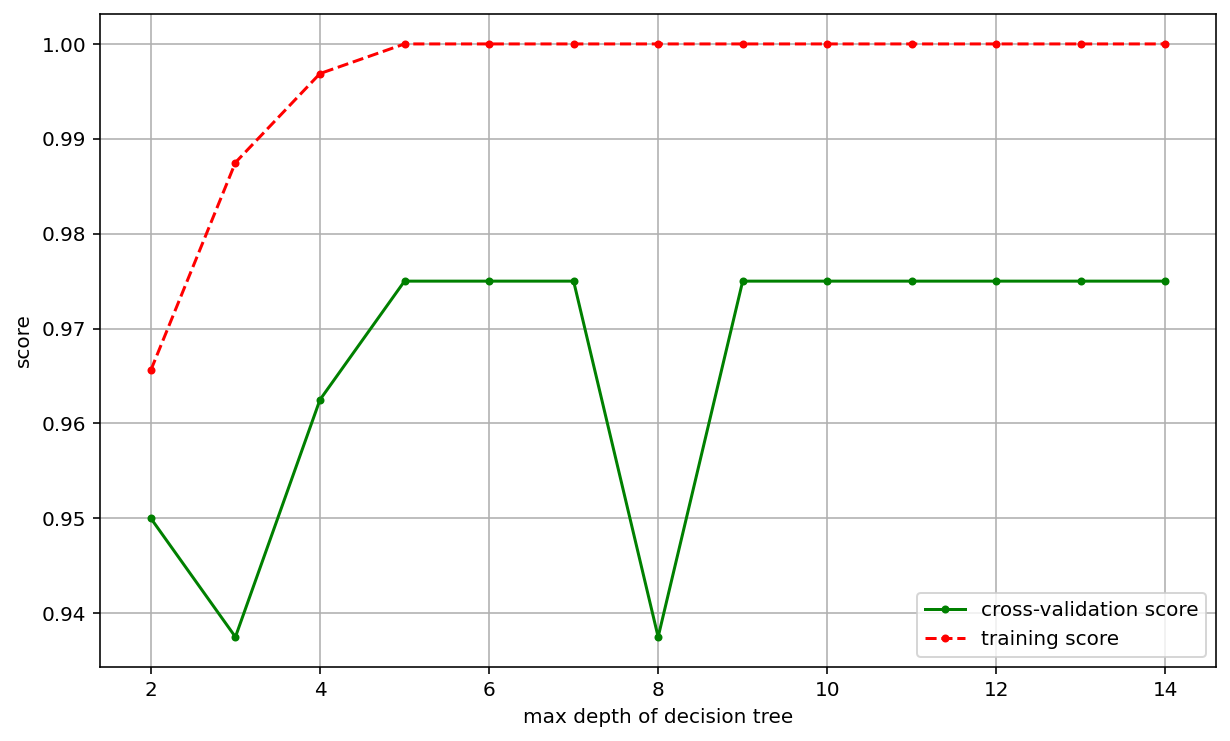

In [78]:
from sklearn.tree import DecisionTreeClassifier

#調整參數max_depth
def cv_score(d):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    cv_score = clf.score(X_test, y_test)
    return (tr_score, cv_score)

#設定深度2~15
depths = range(2, 15)
scores = [cv_score(d) for d in depths]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

#找出驗證資料集分數最高的索引
best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = depths[best_score_index]
#列印最好的參數
print('best param: {0}; best score: {1}'.format(best_param, best_score))

plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.xlabel('max depth of decision tree')
plt.ylabel('score')
plt.plot(depths, cv_scores, '.g-', label='cross-validation score')
plt.plot(depths, tr_scores, '.r--', label='training score')
plt.legend()


best param: 0.0; best score: 0.975


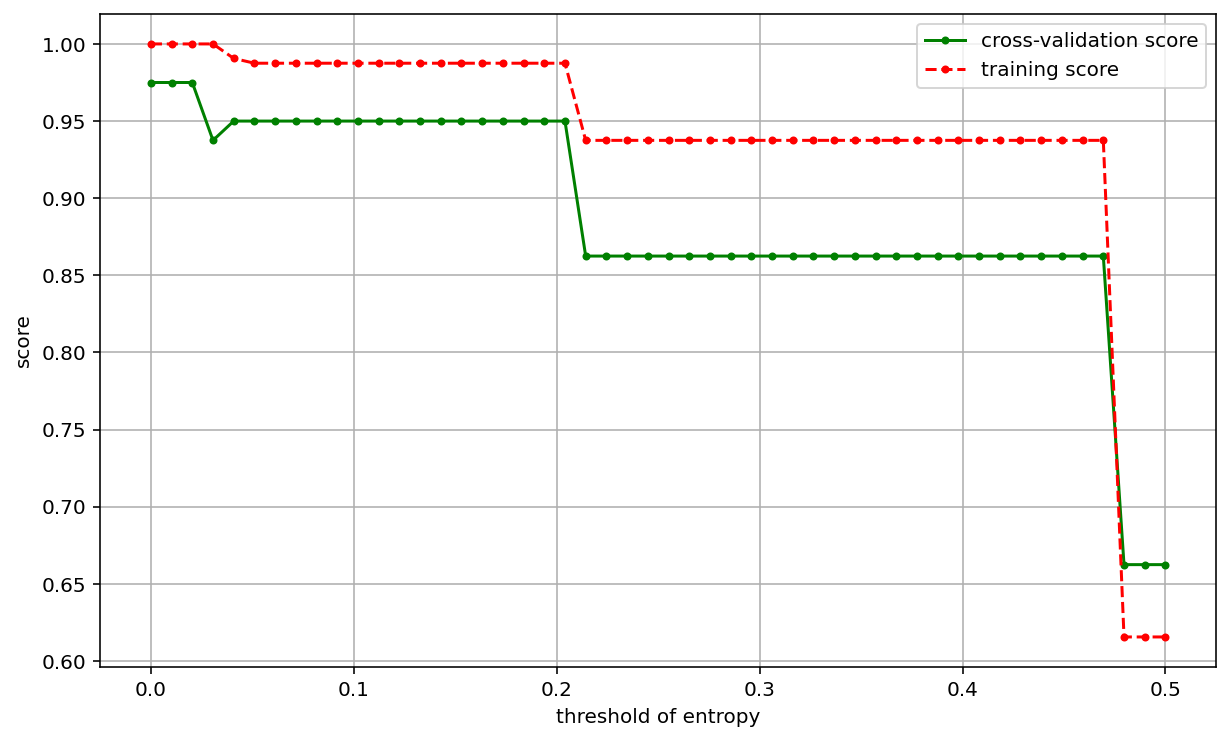

In [57]:
warnings.filterwarnings('ignore')
#利用基尼不純度
#設定閥值參數(min_impurity_split)，當information gain低於這個閥值時，則不進行分歧
def cv_score(val):
    clf = DecisionTreeClassifier(criterion='gini', min_impurity_split=val)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    cv_score = clf.score(X_test, y_test)
    return (tr_score, cv_score)

# 指定閥值範圍
values = np.linspace(0, 0.5, 50)
scores = [cv_score(v) for v in values]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

# 找出分數最高的參數
best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = values[best_score_index]
print('best param: {0}; best score: {1}'.format(best_param, best_score))

# 畫圖
plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.xlabel('threshold of entropy')
plt.ylabel('score')
plt.plot(values, cv_scores, '.g-', label='cross-validation score')
plt.plot(values, tr_scores, '.r--', label='training score')
plt.legend()

In [58]:
def plot_curve(train_sizes, cv_results, xlabel):
    train_scores_mean = cv_results['mean_train_score']
    train_scores_std = cv_results['std_train_score']
    test_scores_mean = cv_results['mean_test_score']
    test_scores_std = cv_results['std_test_score']
    plt.figure(figsize=(10, 6), dpi=144)
    plt.title('parameters turning')
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel('score')
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes, 
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '.--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '.-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

best param: {'min_impurity_split': 0.0}
best score: 0.9650000000000001


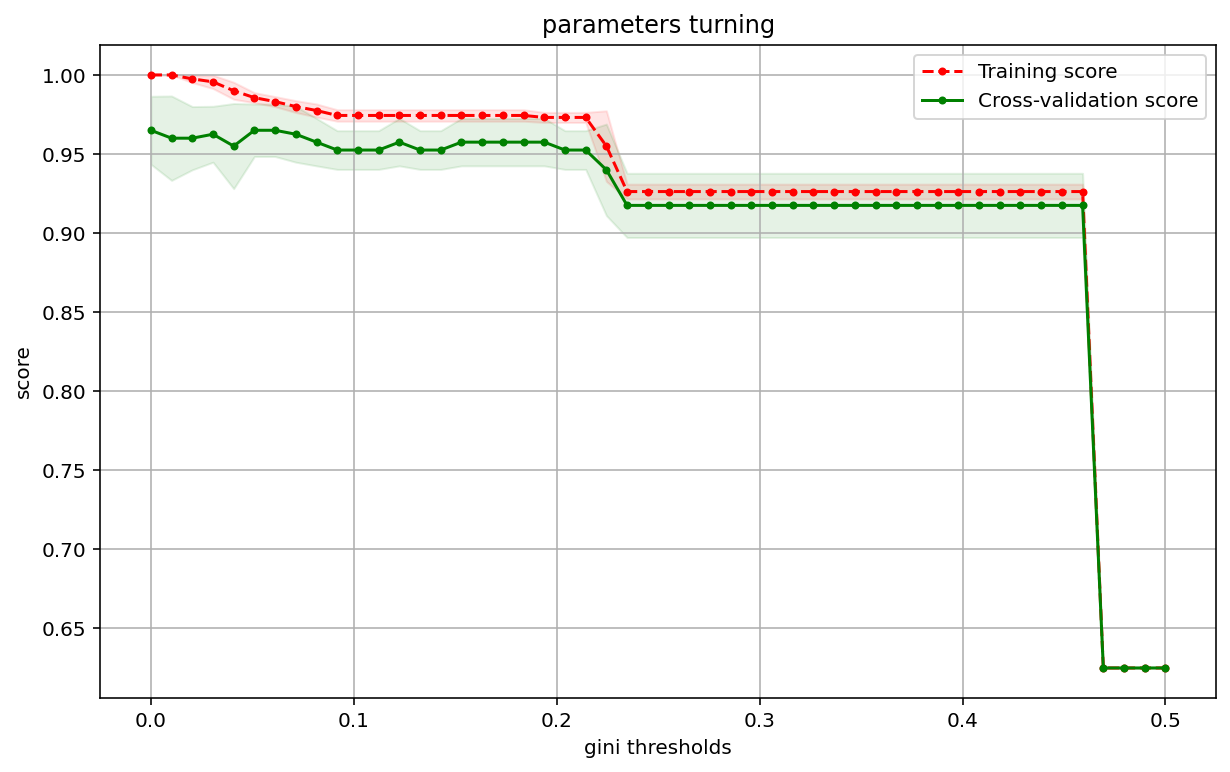

In [59]:
warnings.filterwarnings('ignore')
#透過GridSearchCV進行
#優點: 1. 內建交驗驗證，讓資料樣本穩定 2. 可以同時設定多個參數
from sklearn.model_selection import GridSearchCV

thresholds = np.linspace(0, 0.5, 50)
param_grid = {'min_impurity_split': thresholds}

#每次計算時，都把資料切成5份，拿其中一份做為交叉驗證資料集，其他做為訓練資料集
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
clf.fit(X, y)
print("best param: {0}\nbest score: {1}".format(clf.best_params_, 
                                                clf.best_score_))

plot_curve(thresholds, clf.cv_results_, xlabel='gini thresholds')

In [60]:
warnings.filterwarnings('ignore')
#進行多個參數設定
from sklearn.model_selection import GridSearchCV

entropy_thresholds = np.linspace(0, 1, 50)
gini_thresholds = np.linspace(0, 0.5, 50)

#ID3
param_grid = [{'criterion': ['entropy'], 
               'min_impurity_split': entropy_thresholds},
              {'criterion': ['gini'], 
               'min_impurity_split': gini_thresholds},
              {'max_depth': range(2, 10)},
              {'min_samples_split': range(2, 30, 2)}]

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
clf.fit(X, y)
print("best param: {0}\nbest score: {1}".format(clf.best_params_, 
                                                clf.best_score_))

best param: {'criterion': 'entropy', 'min_impurity_split': 0.02040816326530612}
best score: 0.97


## 生成決策數圖形

In [61]:
clf = DecisionTreeClassifier(criterion='entropy', min_impurity_split=0.5306122448979591)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

from sklearn import tree

with open("chronic_kidney_disease_full.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

train score: 0.9375; test score: 0.8625


# 開啟 titanic.dot檔案，將內文複製貼上
# https://dreampuf.github.io/GraphvizOnline/
